## Implementing SVM on diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### General Functions

In [2]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def showConfussionMatrix(y_test, y_pred, mytitle):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(3,3))
    disp.plot(ax=ax)
    disp.ax_.set(title=mytitle)

In [3]:
from sklearn.preprocessing import LabelEncoder
def encodeClassVariable(df, colName):
    df = df.rename(columns={colName:'class'})
    encoder = LabelEncoder()
    df['class_code'] = encoder.fit_transform(df['class'])
    encoded_df = df[['class', 'class_code']].copy()
    df.pop('class')
    encoded_df.drop_duplicates(subset=None, keep="first", inplace=True)
    return encoded_df, df

### Reading the csv

In [5]:
#df = pd.read_csv('ds/AthleteSelection.csv',index_col = 'Athlete')
df = pd.read_csv('ds/diabetes.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   plas     768 non-null    int64  
 2   pres     768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insu     768 non-null    int64  
 5   mass     768 non-null    float64
 6   pedi     768 non-null    float64
 7   age      768 non-null    int64  
 8   neg_pos  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 51.1+ KB


In [9]:
df.isnull().sum()

preg       0
plas       0
pres       0
skin       0
insu       0
mass       0
pedi       0
age        0
neg_pos    0
dtype: int64

### Generating x and y

In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# For Random splitting 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Implementing SVM

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

,predictions,actual
0,tested_positive,tested_positive
1,tested_negative,tested_negative
2,tested_negative,tested_negative
3,tested_positive,tested_positive
4,tested_negative,tested_negative
...,...,...
149,tested_negative,tested_positive
150,tested_negative,tested_negative
151,tested_positive,tested_positive
152,tested_negative,tested_negative


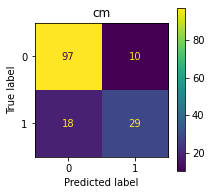

In [21]:
showConfussionMatrix(y_test, y_pred, "cm")

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8181818181818182
